# Uvod u nadzirano strojno učenje 



### Što je strojno učenje?
Arthur Samuel je opisao strojno učenje kao sposobnost računala da uči bez da je eksplicitno programirano. 
Novija i prihvaćenija definicija je ona Toma Mitchella: <br>
    Kažemo da program uči zadatak T kroz iskustvo E ako se njegova perfomansa P u izvođenju zadatka T poboljšava s rastom iskustva E. <br>
Primjer: igranje šaha <br>
    E = iskustvo stečeno kroz igranje mnogo partija šaha <br>
    T = igranje šaha <br>
    P = vjerojatnost da će program pobijediti iduću partiju šaha <br>

Osnovna podjela: 
1. nadzirano učenje - klasifikacija i regresija
2. nenadzirano učenje - grupiranje i smanjenje dimenzionalnosti

### Primjeri strojnog učenja koji utječu na svakodnevicu

- SIRI koristi principe strojnog učenja i drugih tehnologija za imitaciju ljudskih reakcija <br>
- FACEBOOK koristi impresivnu tehnologiju kako bi predložio korisnicima koga trebaju *taggirati* na slikama <br>
- GOOGLE MAPS analizira brzinu u prometu koristeći anonimne lokacijske usluge s mobitela i tako predlaže najbržu rutu <br>
- GMAIL klasificira mailove, ali nedavno su predstavili i sustav koji predlaže tri automatska odgovora na mail <br>
- NETFLIX-u je strojno učenje nužno za prijedloge serija i filmova <br>
- UBER kroz strojno učenje procijenjuje brzinu dolaska na odredište <br>


U ovom radu bavit ću se linearnom i logističkom regresijom iz perspektive nadziranog strojnog učenja.
<br>U nadziranom učenju dani su nam podaci na temelju kojih predviđamo *output*. Postoje dvije, već navedene, kategorije - klasifikacija i regresija. <br>
    Klasifikaciju koristimo ako je _output_ **y** diskretna varijabla, dok regresiju kada je **y** kontinuirana varijabla.

### Primjeri nadziranog učenja:
**klasifikacija**: podaci koji sadrže veličinu tumora i podatak o tome je li tumor dobroćudan (0) ili zloćudan (1) <br>
**regresija**: podaci koji sadrže veličinu kuće i cijenu za koju je ta kuća prodana.
    

### Funkcija pogreške 


Pretpostavimo da imamo podatke gdje je $x_{i}$ *input*, a $y_{i}$ *output*. Funkciju $h_{\theta}$ zovemo hipoteza. <br>
Funkcijom pogreške mjerimo kvadratno odstupanje funkcije hipoteze u točki $x_{i}$ od stvarne, pripadajuće vrijednosti $y_{i}$

$$J(\theta)=\frac{1}{2m}\sum_{i=1}^{m} (y_{i}-h_{\theta}(x_{i}))^2 $$	

gdje je m broj "treninga", odnosno veličina danih podataka

Cilj nam je dobiti što bolju funkciju hipoteze, tj. **minimizirati funkciju pogreške**. *Idealno*, funkcija bi trebala proći kroz sve točke x. U tom slučaju je funkcija pogreške 0. 

### Linearna regresija
Neka je funkcija hipoteze sljedećeg oblika: <br>$h_{\theta}(x)=\theta_{n}\cdot x_{n}+\theta_{n-1}\cdot x_{n-1}+...+\theta_{1}\cdot x_{1}+\theta_{0}$<br><br>
notacija: $x_{j}^{(i)}$=vrijednost svojstva j u i-tom treningu <br>
$x^{(i)}$=svojstva i-tog treninga <br>
$m$ = broj treninga <br>
$n$ = broj svojstava 

Primjer: Znamo populaciju nekog grada i zanima nas predviđen profit prodaje hrane u usluznim djelatnostima s obzirom na dane podatke. 

In [376]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import matrix
import pandas as pd
from numpy import loadtxt, where
from pylab import scatter, xlabel, ylabel, legend, show
from numpy.linalg import inv
import scipy.optimize as opt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [366]:
food = pd.read_csv('profit.txt', header=None,\
                   names=['populacija', 'profit'])
  

food.head(10)

,populacija,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233
5,8.3829,11.8860
6,7.4764,4.3483
7,8.5781,12.0000
8,6.4862,6.5987
9,5.0546,3.8166


Korisno je prikazati podatke da bismo vidjeli kako nam linearna regresija treba izgledati.

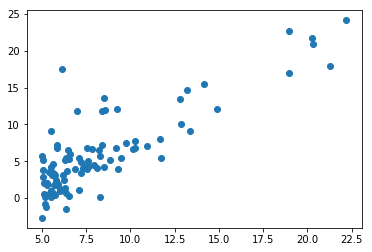

In [79]:
populacija = food.populacija.values
profit = food.profit.values
scatter(populacija, profit, marker='o')

**Kod za izračunavanje funkcije greške:**

Prvo definirajmo funkciju za izračunavanje vrijednosti funkcije hipoteze s obzirom na parametar $\theta$ i dani $x$:

In [5]:
def h(X, theta):
    
    return X * theta

Funkciju za izračunavanje funkcije greške nazovimo cost:

In [60]:
def cost(theta, X, y):
    tmp1 = X * theta - y
    tmp2 = tmp1.T * tmp1 
    m = np.size(y) 
    
    return (1/(2*m)) * tmp2

### Kako odrediti odgovarajuće parametre $\theta$?

Nakon što smo predstavili funkciju hipoteze i funkciju greške, preostaje
odrediti odgovarajuće parametre. To ćemo učiniti pomoću ***gradient descenta***.

Intuitivno, neka je funkcija hipoteze oblika $h_{\theta}(x)=\theta_{1}*x_{1}+\theta_{0}$. Nacrtamo graf koji na x-osi ima parametar $\theta_{0}$, a na y-osi $\theta_{1}$, dok je na z-osi vrijednost funkcije $J(\theta_{0},\theta_{1})$. Znamo da nam je cilj pronaći minimum takve funkcije. To ćemo postići tako da krenemo od bilo koje točke i promatramo tangentu u toj točki koja će nam "reći" u kojem pravcu se trebamo gibati kako bismo došli do minimuma. Gibamo se u koracima veličine $\alpha$. $\alpha$ ne smije biti niti prevelik niti premalen. Ako se povećanjem broja iteracija, funkcija greške povećava, trebamo smanjiti $\alpha$. No, ako je $\alpha$ premalen, konvergencija može biti jako spora.
        

**Algoritam:** <br>
*ponavljati dok ne konvergira:* <br>
     $\theta_{j}=\theta_{j}-\alpha\frac{\partial}{\partial\theta_{j}}J(\theta_{0},\theta_{1})\cdot x_{j} $ <br><br>
     $j=0,...,n$ <br>
     $x_{0}=1$

U matricu podataka potrebno je dodati u 1. stupac jedinice kako bismo mogli provesti prethodno napisani algoritam.

Možemo ubrzati taj algoritam tako da je svako svojstvo sličnog reda veličine. Za to postoje dva načina: <br>
1. skaliranje svojstava <br>
    $x_{i}:=\frac{x_{i}}{max(x)-min(x)}$
2. normalizacija <br>
    $x_{i}:=\frac{x_{i}-\mu_{i}}{s_{i}}$


Vratimo se na prethodni primjer i izračunajmo parametre za linearnu regresiju. <br>
Prvo što je potrebno napisati funkciju koja računa *gradient descent*. 

In [62]:
def gradient_descent(theta, X, y, alpha, iterations):
    m = np.size(y)
    for i in range(iterations):
        pred = np.dot(X, theta)
        vel = np.size(theta)
        for it in range(vel):
            tmp = X[:, it]
            err = (pred-y)*tmp
            theta[it][0]  =theta[it][0]-(alpha/m)*err.sum()
            
    return theta

Korisno je koristiti vektorizirani oblik gradijenta za lakše izračunavanje.

In [63]:
def gradient_descent_vectorized(theta, X, y, alpha, iterations):
    m = np.size(y)
    step = alpha/m
    for i in range(iterations):
        theta -= step * X.T * (X*theta - y)
    print(theta) 
    
    return theta

In [367]:
food.insert(0, 'jedinice', 1)  
food_copy = copy.copy(food)

Dakle, nakon dodavanja stupca jedinica u početne podatke matrica X je oblika:

In [67]:
food.loc[:5, :]

,jedinice,populacija,profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233
5,1,8.3829,11.8860


In [81]:
food = matrix(food)
X_population = food[:,0:2]
y_profit = matrix(profit).T

Potrebno je odabrati proizvoljnu $\theta$ od koje želimo da algoritam gradient descent kreće. Neka je $\theta=(0,0)$.

In [69]:
theta = matrix(np.zeros((2,1)))

Konačno, izračunajmo parametre $\theta_{0}$ i $\theta_{1}$ pomoću *gradient descenta*:

In [84]:
theta_new = gradient_descent_vectorized(theta, X_population, y_profit, alpha=0.01, iterations=1500)

[[-3.87805118]
 [ 1.1912525 ]]


Iz svega napisanog slijedi: $$h_{\theta}(x)=-3.9 + 1.19\cdot x$$

Prikažimo sada podatke na istom grafu kao i pravac s procijenjenim parametrima.

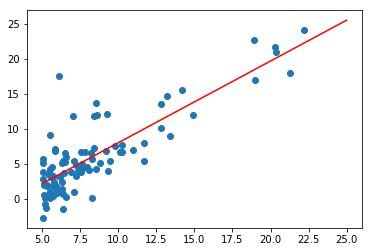

In [82]:
plt.figure()
plt.scatter(populacija, profit, marker='o')
x_axis = np.arange(5.0,25.0,0.01)
h_food = theta_new[0] + theta_new[1]*x_axis
plt.plot(x_axis, h_food.T, c='r')

Provjerimo kolika nam je greška.

In [83]:
cost(theta_new, X_population, y_profit).item(0)

4.483388256587726

Drugi način za  određivanje odgovarajućih parametara je **normalna jednadžba**. <br>
Ovom metodom, minimiziramo funkciju $J(\theta)$ tako da eksplicitno deriviramo po $\theta_{j}$ te derivacije izjednačavamo s 0. Tako nalazimo optimum bez iteracija. 
$$\theta=(X^{T}X)^{-1}X^{T}y$$ <br>
Ova metoda je bolja jer ne trebamo odabirati $\alpha$, nemamo iteracija, no složenija je i sporija ako je broj svojstava velik.

Prethodni primjer gdje koristimo normalnu jednadžbu kako bismo odredili odgovarajuće parametre $\theta$:

Koristimo već zapisanu formulu $\theta=(X^{T}X)^{-1}X^{T}y$. <br>
Važno je napomenuti da, kao i za algoritam gradient descenta, vrijednost $x_{0}$ postavljamo na 1. 

In [88]:
theta_normal = inv(X_population.T*X_population)*X_population.T*y_profit
theta_normal

matrix([[-3.89578088],
        [ 1.19303364]])

Dakle, metodom normalne jednadžbe funkcija hipoteze nam izgleda kao i prilikom metode gradient descenta:
$$h_{\theta}(x)=-3.9+1.19\cdot x$$

In [90]:
cost(theta_normal, X_population, y_profit).item(0)

4.476971375975179

Uspoređujući funkciju troška s obzirom na parametre dobivene *gradient descentom* i normalnom jednadžbom, primjećujemo da su približno iste vrijednosti.

Preostaje i treći način za dobivanje funkcije hipoteze pomoću **scikit-learn** u Pythonu. <br>
Prvo, definiramo *input* X i *output* y:

In [371]:
X = food_copy[['populacija']]
y = food_copy[['profit']]

Zatim treniramo model pomoću podataka koje imamo:

In [444]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

regression_model = LinearRegression()
regression_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Nakon što je model istreniran, pogledamo koeficijente linearne regresije:

In [446]:
for idx, col_name in enumerate(X_train.columns):
    print("Koeficijent za {} je {}".format(col_name, regression_model.coef_[0][idx]))

Koeficijent za populacija je 1.20106493803116


In [447]:
intercept = regression_model.intercept_[0]
print("Sjeciste s osi y iznosi {}".format(intercept))

Sjeciste s osi y iznosi -3.914258550869471


Slijedi, $h_{\theta}(x)=-3.9+1.2\cdot x$

In [448]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format((regression_model).score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.33


Primjećujemo da smo u sva tri načina dobili približno jednak rezultat.

### Polinomijalna regresija
Hipoteza ne mora biti linearna funkcija ako dobro ne opisuje zadane podatke. Možemo promijeniti ponašanje krivulje tako da odaberemo kvadratnu, kubičnu ili neku sličnu krivulju. 

### Logistička regresija

Što raditi kada imamo problem klasifikacije, tj. *output* je diskretna varijabla? <br>
*Primjer*: Želimo napraviti algoritam koji prepoznaje spam mail. Neka je $y=1$ ako je to spam, u suprotnom $y=0$. Dakle, $y\in{0,1}$. <br>
0 se često naziva negativnom klasom, a 1 pozitivnom. 

Za potrebe klasifikacije, konstruiramo novu funkciju - **sigmoid function** ili **logistička funkcija**. <br>
$$h_{\theta}=g(\theta^{T}x)$$ <br>
$$z=\theta^{T}x$$ <br>
$$g(z)=\frac{1}{1+e^{-z}} $$

Sljedeća slika prikazuje izgled logističke funkcije:

In [91]:
def sigmoid(x):
    s = 1.0 + np.exp(-x)
    s = 1.0/s 
    
    return s

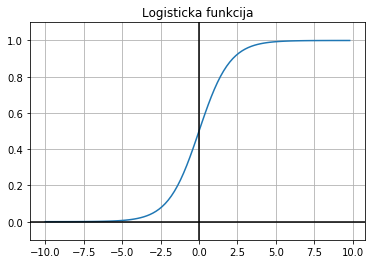

In [149]:
x = np.arange(-10., 10., 0.2)
y = np.linspace(0, len(x), len(x))

plt.plot(x, sigmoid(x))
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.ylim(-0.1,1.1)
plt.title('Logisticka funkcija')
plt.show()

Očito je da logistička funkcija poprima vrijednosti između 0 i 1 što je čini pogodnim izborom za klasifikacijske probleme. <br>
$h_{\theta}(x)$ daje **vjerojatnost** da je naš *output* 1. Preciznije, $h_{\theta}(x)=P(y=1|x;\theta)$

Uz sve rečeno, granica odlučivanja je linija koja razdvaja podatke gdje je y=1 od onih gdje je y=0. <br>
$h_{\theta}\geq0.5\rightarrow y=1$ <br>
$h_{\theta}<0.5\rightarrow y=0$

Potrebno je prilagoditi i funkciju greške zbog toga što bi logistička funkcija na prethodno definiranoj funkciji greške uzrokovala puno lokalnih optimuma, tj. ne bi bila konveksna. 

$$J(\theta)=\frac{1}{m}\sum_{i=1}^{m}Cost(h_{\theta}(x^{(i)},y^{(i)})$$

$Cost(h_{\theta}(x),y)=-log(h_{\theta}(x))$ ako y=1 <br>
$Cost(h_{\theta}(x),y)=-log(1-h_{\theta}(x))$ ako y=0 

In [95]:
def log_cost(theta,X,y):
    theta = np.matrix(theta)
    y = np.matrix(y)
    X = np.matrix(X)
    m = len(X)
    tmp1 = np.multiply(-y, np.log(sigmoid(X*theta.T)))
    tmp2 = np.multiply((1-y), np.log(1-sigmoid(X*theta.T)))
    J = np.sum(tmp1-tmp2)/m
    return J

Prilažem i vektorizirani oblik izračunavanja funkcije greške logističke regresije.

In [96]:
def log_cost_vectorized(theta, X, y):
    theta = np.matrix(theta).T
    m = np.size(y)
    J = -(y.T * np.log(sigmoid(X*theta))) - \
        ((1-y).T * np.log(1 - sigmoid(X*theta)))
    
    return J/m

Izgled funkcije greške logističke regresije s obzirom na vrijednosti y:

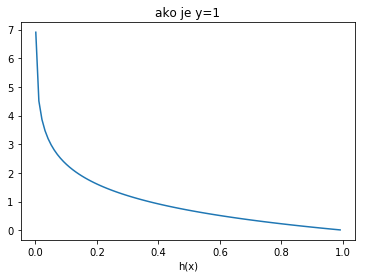

In [97]:
x = np.arange(0.001, 1., 0.01)
y = np.linspace(0, len(x), len(x))
sig = -np.log(x)
plt.plot(x, sig)
plt.title('ako je y=1')
plt.xlabel('h(x)')
plt.show()

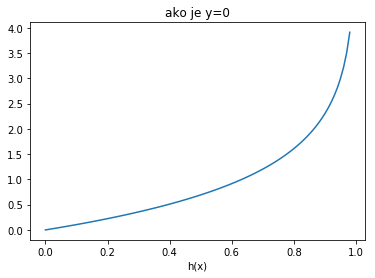

In [98]:
x = np.arange(0., 0.99, 0.01)
y = np.linspace(0, len(x), len(x))
sig = -np.log(1-x)
plt.plot(x, sig)
plt.title('ako je y=0')
plt.xlabel('h(x)')
plt.show()

Vidimo da je u oba slučaja funkcija greške konveksna funkcija.

Gradijent funkcije troška je vektor čiji je j-ti element definiran na sljedeći način:

$$\frac{\partial J(\theta)}{\partial \theta_{j}}=\frac{1}{m}\sum_{i=1}^{m}(h_{\theta}(x^{(i)}-y^{(i)})x_{j}^{(i)}$$

In [100]:
def grad(theta, X, y):
    theta = np.matrix(theta)
    y = np.matrix(y)
    X = np.matrix(X)
    gradient = np.zeros(3)
    rez = gradient.size
    razlika = sigmoid(X.dot(theta.T))-y
    m = X.shape[0]
    for i in range(rez):
        temp5 = razlika.T.dot(X[:,i])
        gradient[i] = (1.0/m)*temp5*-1
    theta.shape = (3,)
    return gradient

In [101]:
def gradient_vectorized(theta, X, y):
    m = np.size(y)
    theta = matrix(theta).T
    grad = X.T * (sigmoid(X * theta) - y)
    
    return grad/m

Pokažimo logističku regresiju na primjeru: <br>
*Administratori smo nekog sveučilišta i želimo procijeniti vjerojatnost primanja na sveučilište svakog prijavljenog studenta s obzirom na rezultate postignute na dva testa.* <br>

In [102]:
exams = pd.read_csv('studentsdata.txt', sep=',', names=['test_1', 'test_2', 'primljeni'])
exams.head(10)

,test_1,test_2,primljeni
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
5,45.083277,56.316372,0
6,61.106665,96.511426,1
7,75.024746,46.554014,1
8,76.098787,87.420570,1
9,84.432820,43.533393,1


Prvo je svakako korisno vizualizirati podatke:

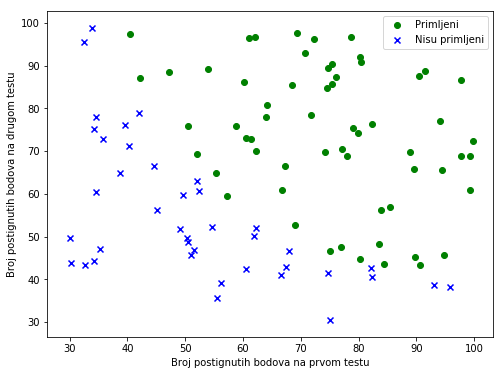

In [123]:
fig,ax=plt.subplots(figsize=(8,6))
pos=exams[exams['primljeni'].isin([1])]
neg=exams[exams['primljeni'].isin([0])]
scatter(pos['test_1'],pos['test_2'],marker='o',c='g',label='Primljeni')
scatter(neg['test_1'],neg['test_2'],marker='x',c='b',label='Nisu primljeni')
ax.legend()
xlabel('Broj postignutih bodova na prvom testu')
ylabel('Broj postignutih bodova na drugom testu')
show()

Gdje su zeleno označeni primljeni, a plavo označeni nisu primljeni na fakultet. <br>


Da bismo odredili vjerojatnost primanja studenta na sveučilište s obzirom na dva testa, prvo moramo naći minimum funkcije greške, tj. odrediti parametre za logističku regresiju. U tu svrhu koristimo scipy funkciju **fmin_tnc**. 

In [104]:
def random_numbers_generator(a, b, d1, d2):
    v = np.random.rand(d1, d2)
    v = (b-a)*v + a 
    
    return v

In [105]:
exams.insert(0, 'jedinice', 1)
stupci = exams.shape[1]
X = exams.iloc[:, 0:stupci-1]
y = exams.iloc[:, stupci-1:stupci]
X = matrix(X.values)
y = matrix(y.values)

In [106]:
theta = matrix(random_numbers_generator(-0.5, 0.5, 3, 1), dtype=float)

Dodali smo stupac jedinica u podatke kako bismo mogli pozvati funkciju log_cost_vectorized, za početnu $\theta$ uzimamo onu generiranu slučajnim odabirom. Pomoću definirane funkcije random_numbers_generator prilagođena je veličina $\theta$.

In [107]:
parametri = opt.fmin_tnc(func=log_cost_vectorized, fprime=gradient_vectorized, x0=theta, args=(X, y))
parametri = matrix(parametri[0])
parametri

matrix([[-25.16086615,   0.20622564,   0.20146995]])

In [108]:
log_cost_vectorized(parametri, X, y)

matrix([[0.2034977]])

In [ ]:
yy = -25

Pretpostavimo da imamo studenta koji je na prvom testu ostvario 45 bodova, a na drugom 85. Izračunajmo vjerojatnost da bude primljen na sveučilište.

In [109]:
def predict(theta, x):
    p = sigmoid(x*theta)
    
    return p

In [110]:
student = matrix(np.array([1, 45, 85]))
vjerojatnost = predict(parametri.T, student)
"{0:.2f}%".format(vjerojatnost.item(0)*100)

'77.63%'

In [435]:
from sklearn.linear_model import LogisticRegression
X_exam = exams.iloc[:,1:3]
y_exam = exams.iloc[:,3]
Xe_train, Xe_test, ye_train, ye_test = train_test_split(X_exam, y_exam, test_size=0.25, random_state=1)
logreg = LogisticRegression()
logreg.fit(Xe_train, ye_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [436]:
for idx, col_name in enumerate(Xe_train.columns):
    print("Koeficijent za {} je {}".format(col_name, logreg.coef_[0][idx]))

Koeficijent za test_1 je 0.03116754111445834
Koeficijent za test_2 je 0.029897026871488992


In [437]:
intercept2 = logreg.intercept_[0]
print("Sjeciste s osi y iznosi {}".format(intercept2))

Sjeciste s osi y iznosi -3.293035712965923


In [440]:
y_pred = logreg.predict(Xe_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(ye_test, y_pred)
confusion_matrix

array([[ 4,  7],
       [ 0, 14]])

Slijedi da za test_1 s obzirom na skup podataka za *trening* imamo 4 točna predviđanja i 0 netočnih, dok za test_2 imamo 7 netočnih i 14 točnih.

In [442]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(Xe_test, ye_test)))

Accuracy of logistic regression classifier on test set: 0.72


Točnost tako dobivenog modela na testnim podacima je 72%

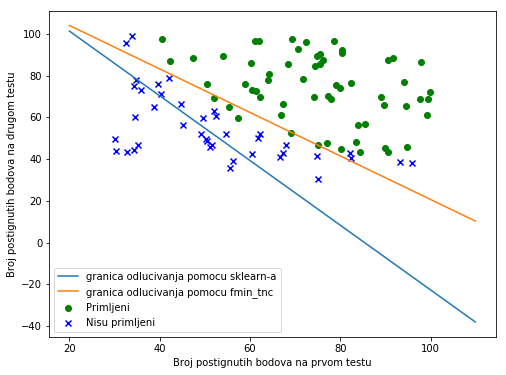

In [456]:
fig,ax=plt.subplots(figsize=(8,6))
pos=exams[exams['primljeni'].isin([1])]
neg=exams[exams['primljeni'].isin([0])]
scatter(pos['test_1'],pos['test_2'],marker='o',c='g',label='Primljeni')
scatter(neg['test_1'],neg['test_2'],marker='x',c='b',label='Nisu primljeni')
x = np.arange(20,110,0.1)
plt.plot(x,(3.15-0.0369*x)/0.0238, label='granica odlucivanja pomocu sklearn-a')
plt.plot(x,(25.16-0.21*x)/0.2014, label='granica odlucivanja pomocu fmin_tnc')

ax.legend()
xlabel('Broj postignutih bodova na prvom testu')
ylabel('Broj postignutih bodova na drugom testu')
show()

Možemo primijetiti da metodom traženja minimuma funkcije greške dobivamo bolju granicu odlučivanja za naš skup podataka od metode treniranja modela za logističku regresiju.

### Problem *overfittinga*

Promatrajmo problem predviđanja y s obzirom na x $\in R$. Prvi graf prikazuje rezultat prilagdođavanja $y=\theta_{0}+\theta_{1}x$ zadanim podacima. Vidimo da podaci zapravo ne leže na ravnoj liniji pa procjena nije dovoljno dobra. <br>
Međutim, postoji i opasnost u dodavanju previše svojstava. Drugi graf je rezultat opisivanja podataka polinomom stupnja 2. Iako krivulja savršeno opisuje zadane podatke, ona nije dobar predikator. <br>



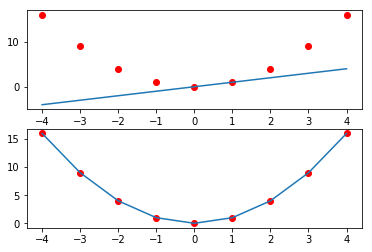

In [143]:
def f1(t):
    return t

def f3(t):
    return t**2

x = np.arange(-4, 5, 1)
y1 = f3(x)
plt.figure(1)
plt.subplot(211)
plt.plot(x, y1, 'ro')
plt.plot(x, f1(x))

plt.subplot(212)
y2 = f3(x)
plt.plot(x, y1, 'ro')
plt.plot(x, y2)

Kažemo da je prvi graf primjer *underfittinga* - krivulja ne opisuje dobro podatke, dok je drugi graf primjer *overfittinga*. <br> 
**Kada se overfitting može dogoditi?**<br>
Uzmimo za primjer da nam je dan neki skup podataka na temelju kojega želimo predvidjeti vrijednosti *outputa* za bilo koji *input*. Sljedeće što nam se može dogoditi je da s funkcijom hipoteze savršeno opišemo naše dane podatke, no ako uzmemo neki novi *input* $x$ da funkcija hipoteze ne predviđa dobar *output* $y$. <br><br>
**Rješavanje problema overfittinga:** <br>
1. smanjenje broja svojstava
2. regularizacija

**Regularizacija:** <br>
Funkcija troška postaje: <br>
$$\frac{1}{2m}\sum_{i=1}^{m}(h_{\theta}(x^{(i)}-y^{(i)})^{2}+\lambda\sum_{j=1}^{n}\theta_{j}^{2}$$

$\lambda$ je parametar učenja. Koristeći takvu funkciju troška smanjujemo *overfitting*. No, $\lambda$ ne smije biti prevelik kako ne bismo došli do *underfittinga*. 

In [309]:
def cost_reg(theta, X, y, rate):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    tmp1 = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    tmp2 = np.multiply((1 - y), np.log(1-sigmoid(X * theta.T)))
    regularization = (rate / (2 * len(X))) * np.sum(np.power(theta[:,1:theta.shape[1]], 2))
    
    return np.sum(tmp1 - tmp2) / (len(X)) + regularization

In [310]:
def cost_reg_vectorized(theta, X, y, rate):
    theta = np.matrix(theta).T
    m = np.size(y)
    J = -(y.T * np.log(sigmoid(X*theta))) - \
        ((1-y).T * np.log(1 - sigmoid(X*theta)))
    reg = (rate / (2 * len(X)) * np.sum(np.power(theta[:,1:theta.shape[1]], 2)))
    return J/(2*m) 

**Regularizirana linearna i logistička regresija:** <br>
Modificirani gradijent: <br>
            Repeat {
 $$\theta_{0}:=\theta_{0}-\alpha\frac{1}{m}\sum_{i=1}^{m}(h_{\theta}(x^{(i)}-y^{(i)})x_{0}^{(i)}$$ 
 $$\theta_{j}:=\theta_{j}-\alpha((\frac{1}{m}\sum_{i=1}^{m}(h_{\theta}(x^{(i)}-y^{(i)})x_{j}^{(i)})+\frac{\lambda}{m}\theta_{j})$$
} <br>
j$\in${1,2,...,n}

In [182]:
def gradient_reg(theta, X, y, rate):
    X = np.matrix(X)
    y = np.matrix(y)
    theta = np.matrix(theta)
    rez = theta.size
    gradient = np.zeros(rez)
    razlika = sigmoid(X * theta.T) - y
    m = X.shape[0]
    for i in range(rez):
        tmp = np.multiply(razlika, X[:,i])
        if (i == 0):
            gradient[i] = np.sum(tmp) / len(X)
        else:
            gradient[i] = (np.sum(tmp) / len(X)) + ((rate / len(X)) * theta[:, i])
            
    return gradient

In [201]:
def gradient_reg_vectorized(theta, X, y, rate):
    X = np.matrix(X)
    y = np.matrix(y)
    theta = matrix(theta).T
    grad = np.zeros(theta.size)
    new_theta = theta
    new_theta[0] = 0
    m = y.size
    grad = (1/m) * (X.T * (sigmoid(X * theta) - y)) + new_theta * (rate/m)
    
    return grad

*Primjer: Pretpostavimo da vodimo tvornicu i na raspolaganju su nam podatci o mikročipovima s obzirom na dva testa. Na temelju tih testova, želimo procijeniti treba li mikročip biti stavljen u prodaju ili odbačen.*

In [328]:
chips = pd.read_csv("chips.txt", delimiter=",", names=["prvi_test", "drugi_test", "primljeni"])
chips.loc[50:60,:]

,prvi_test,drugi_test,primljeni
50,0.137670,0.575290,1
51,-0.006336,0.399850,1
52,-0.092742,0.553360,1
53,-0.207950,0.355990,1
54,-0.207950,0.173250,1
55,-0.438360,0.217110,1
56,-0.219470,-0.016813,1
57,-0.138820,-0.272660,1
58,0.183760,0.933480,0
59,0.224080,0.779970,0


Zašto ćemo na ovim podacima koristiti regulariziranu logističku regresiju? <br>
Pogledajmo kako podaci izgledaju.

In [329]:
import copy
data = copy.copy(chips)
data.insert(3, 'jedinice', 1)


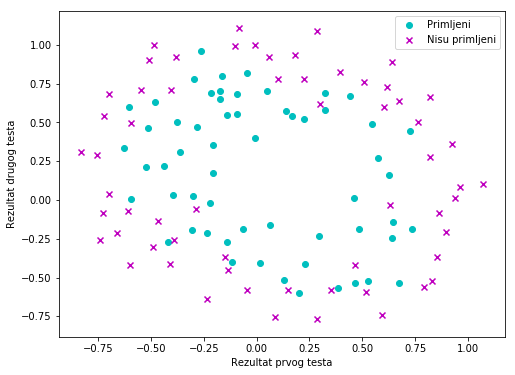

In [330]:
fig,ax=plt.subplots(figsize=(8,6))
pos_c=chips[chips['primljeni'].isin([1])]
neg_c=chips[chips['primljeni'].isin([0])]
scatter(pos_c['prvi_test'],pos_c['drugi_test'],marker='o',c='c',label='Primljeni')
scatter(neg_c['prvi_test'],neg_c['drugi_test'],marker='x',c='m',label='Nisu primljeni')
ax.legend()
xlabel('Rezultat prvog testa')
ylabel('Rezultat drugog testa')
show()

Jasno je da podaci ne mogu biti razdvojeni ravnom linijom na skup onih koji su primljeni i onih koji nisu primljeni za daljnju prodaju. Zbog toga *"obična"* logistička regresija neće dobro predviđati rezultate jer ona može pronaći samo linearnu granicu odlučivanja. Primjećujemo da nam treba polinom višeg stupnja kao dobra linija odlučivanja, no uzmemo li prevelik stupanj, dolazimo do *overfittinga*. Zato pristupamo problemu pomoću regularizirane logističke regresije tako da dodamo polinomijalna svojstva u matricu podataka.  <br>
Prvo napišimo funkciju koja dodaje polinomijalna svojstva u matricu podataka, s izborom stupnja 5: 


In [331]:
degree = 5
x1 = data['prvi_test']
x2 = data['drugi_test']
for i in range(1, degree):
    for j in range(0, i):
        data['F' + str(i) + str(j)] = np.power(x1, i-j) * np.power(x2, j) 

data.drop('prvi_test', axis=1, inplace=True)
data.drop('drugi_test', axis=1, inplace=True)

Sada nam matrica podataka izgleda ovako:

In [332]:
data.head()

,primljeni,jedinice,F10,F20,F21,F30,F31,F32,F40,F41,F42,F43
0,1,1,0.051267,0.002628,0.035864,0.000135,0.001839,0.025089,0.000007,0.000094,0.001286,0.017551
1,1,1,-0.092742,0.008601,-0.063523,-0.000798,0.005891,-0.043509,0.000074,-0.000546,0.004035,-0.029801
2,1,1,-0.213710,0.045672,-0.147941,-0.009761,0.031616,-0.102412,0.002086,-0.006757,0.021886,-0.070895
3,1,1,-0.375000,0.140625,-0.188321,-0.052734,0.070620,-0.094573,0.019775,-0.026483,0.035465,-0.047494
4,1,1,-0.513250,0.263426,-0.238990,-0.135203,0.122661,-0.111283,0.069393,-0.062956,0.057116,-0.051818


In [335]:
stupci = data.shape[1]
X_chips = data.iloc[:,1:stupci]
Y_chips = data.iloc[:,0:1]
X_chips = np.array(X_chips.values)
Y_chips = np.array(Y_chips.values)
theta_chips = np.zeros(11)
cost_reg(theta_chips, X_chips, Y_chips, rate=1)

0.6931471805599454

Funkcija troška, s obzirom na $\theta=0$, iznosi 0.7.

Pronađimo minimum funkcije troška pomoću funkcije fmin_tnc kao i u prethodnim primjerima.

Uzimamo prvo parametar učenja, $\lambda=1$ i $\theta=0$.

In [336]:
rate = 1
theta_chips = np.zeros(11)

In [337]:
res = opt.fmin_tnc(func=cost_reg, x0=theta_chips, fprime=gradient_reg, args=(X_chips, Y_chips, rate))
res

(array([ 0.53010247,  0.29075567, -1.60725764, -0.58213819,  0.01781027,
        -0.21329507, -0.40024142, -1.3714414 ,  0.02264304, -0.9503358 ,
         0.0344085 ]), 22, 1)

In [340]:
cost_reg(res[0], X_chips, Y_chips, rate=1)

0.6226824388287175

Za kraj, uzmimo $\lambda=10$ i početni $\theta=1$ i usporedimo rezultat s prethodnim rezultatom.

In [348]:
rate = 10
theta_chips = np.ones(11)
res2 = opt.fmin_tnc(func=cost_reg, x0=theta_chips, fprime=gradient_reg, args=(X_chips, Y_chips, rate))
res2

(array([ 0.12542043, -0.03761557, -0.42843964, -0.10536766, -0.08849268,
        -0.06895069, -0.06280555, -0.33401531, -0.01323026, -0.13117474,
        -0.02069478]), 23, 1)

In [349]:
cost_reg(res2[0], X_chips, Y_chips, rate=1)

0.6601859498158043